In [9]:
from diarizer import Diarizer
import utils

import os
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

from IPython.display import Audio, display, HTML
from tqdm.autonotebook import tqdm

WAV_FILE = './dataset/Test5.wav'
signal, sr = sf.read(WAV_FILE)


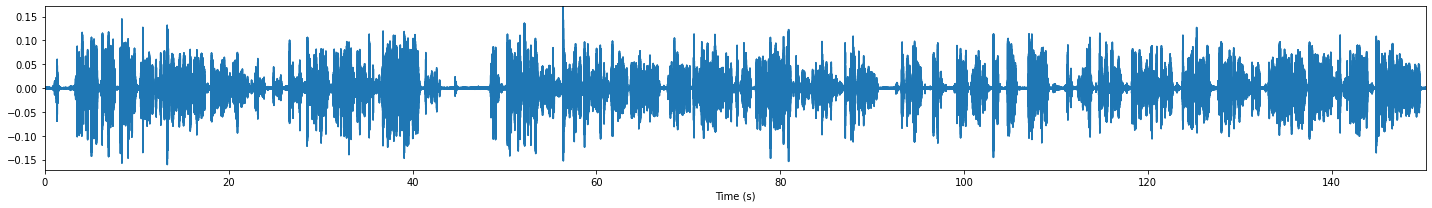

In [10]:
_ = utils.waveplot(signal, sr, figsize=(20,3))
plt.show()

In [11]:
diar = Diarizer(
                embed_model='xvec', # supported types: ['xvec', 'ecapa']
                cluster_method='sc', # supported types: ['ahc', 'sc']
                window=1.5, # size of window to extract embeddings (in seconds)
                period=0.75 # hop of window (in seconds)
                )

segments = diar.diarize(WAV_FILE, 
                        threshold=2.5,
                        outfile='test.rttm')

Using cache found in /home/waizwafiq/.cache/torch/hub/snakers4_silero-vad_master


Converting audio file to single channel WAV using ffmpeg...


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

Running VAD...
Splitting by silence found 7 utterances
Extracting embeddings...


Utterances: 100%|██████████| 7/7 [00:00<00:00, 14.60it/s]
/home/waizwafiq/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:234: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Clustering to 2 speakers...
Cleaning up output...
Done!


In [12]:
segments

[{'start': 0.59375,
  'end': 1.9686875,
  'label': 1,
  'start_sample': 9500,
  'end_sample': 31499},
 {'start': 2.625,
  'end': 9.75,
  'label': 0,
  'start_sample': 42000,
  'end_sample': 156000},
 {'start': 9.75,
  'end': 27.0,
  'label': 1,
  'start_sample': 156000,
  'end_sample': 432000},
 {'start': 27.0,
  'end': 33.0,
  'label': 0,
  'start_sample': 432000,
  'end_sample': 528000},
 {'start': 33.0,
  'end': 36.75,
  'label': 1,
  'start_sample': 528000,
  'end_sample': 588000},
 {'start': 36.75,
  'end': 40.5,
  'label': 0,
  'start_sample': 588000,
  'end_sample': 648000},
 {'start': 40.5,
  'end': 43.5936875,
  'label': 1,
  'start_sample': 648000,
  'end_sample': 697499},
 {'start': 44.125,
  'end': 45.6249375,
  'label': 1,
  'start_sample': 706000,
  'end_sample': 729999},
 {'start': 48.0625,
  'end': 49.9375,
  'label': 1,
  'start_sample': 769000,
  'end_sample': 799000},
 {'start': 49.9375,
  'end': 53.6875,
  'label': 0,
  'start_sample': 799000,
  'end_sample': 859000

In [33]:
import pandas as pd

def to_df(segments):
    start = [segment['start'] for segment in segments]
    end = [segment['end'] for segment in segments]
    label = [segment['label'] for segment in segments]
    start_sample = [segment['start_sample'] for segment in segments]
    end_sample = [segment['end_sample'] for segment in segments]
    
    dictionary = {
        'start': start, 
        'end' : end,
        'label': label,
        'start_sample': start_sample,
        'end_sample': end_sample
    }
    return pd.DataFrame(dictionary)

In [34]:
to_df(segments)

,start,end,label,start_sample,end_sample
0,0.59375,1.968687,1,9500,31499
1,2.62500,9.750000,0,42000,156000
2,9.75000,27.000000,1,156000,432000
3,27.00000,33.000000,0,432000,528000
4,33.00000,36.750000,1,528000,588000
5,36.75000,40.500000,0,588000,648000
6,40.50000,43.593688,1,648000,697499
7,44.12500,45.624938,1,706000,729999
8,48.06250,49.937500,1,769000,799000
9,49.93750,53.687500,0,799000,859000


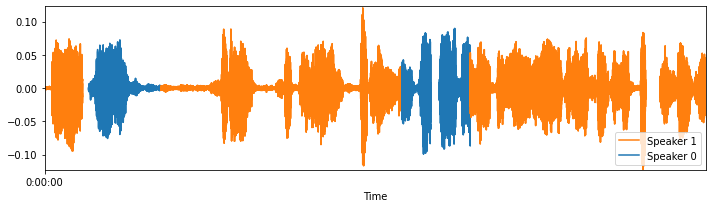

In [ ]:
utils.combined_waveplot(signal, sr, segments, figsize=(10, 3), tick_interval=60)
plt.show()